# Produce visualizations
## Group 2


In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import download
import descriptives as dcts

In [48]:
eviction = download.load_evict('../inputs/eviction_data_tract.csv')
crime = download.load_crime('../inputs/crime_by_tract.csv')
buildings = download.load_building('../inputs/building_violation_by_tract.csv')
acs = download.load_acs('../inputs/acs_year_tract.csv')
education = download.load_education('../inputs/educ_year_tract.csv')
tracts = download.load_tract('../inputs/ch_opdat/tracts.csv', True)

In [51]:
tracts = download.convert_to_geopandas(tracts, 'location')
type(tracts)

geopandas.geodataframe.GeoDataFrame

In [52]:
eviction_df = download.join_bases(eviction, acs, education, crime, buildings, tracts, True)
type(eviction_df)

geopandas.geodataframe.GeoDataFrame

In [7]:
eviction_df.columns

Index(['tract', 'commarea', 'location', 'geometry', 'filing_year',
       'eviction_filings_total', 'eviction_filings_rate',
       'eviction_filings_completed', 'case_type_single_action',
       'case_type_joint_action',
       ...
       'total_department_bureau_SIGNS_mean_by_commarea',
       'total_department_bureau_SPECIAL INSPECTION PROGRAM_mean_by_commarea',
       'total_department_bureau_SPECIAL TASK FORCE_mean_by_commarea',
       'total_department_bureau_VENTILATION_mean_by_commarea',
       'total_department_bureau_WATER_mean_by_commarea',
       'total_violation_status_COMPLIED_perc_mean_by_commarea',
       'total_violation_status_NO ENTRY_perc_mean_by_commarea',
       'total_violation_status_OPEN_perc_mean_by_commarea',
       'total_inspection_category_COMPLAINT_perc_mean_by_commarea',
       'perc_increase_bv_mean_by_commarea'],
      dtype='object', length=280)

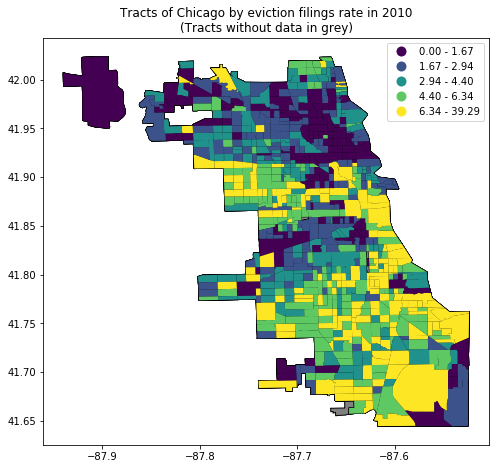

In [8]:
dcts.plot_map(eviction_df, 'eviction_filings_rate', 2010)

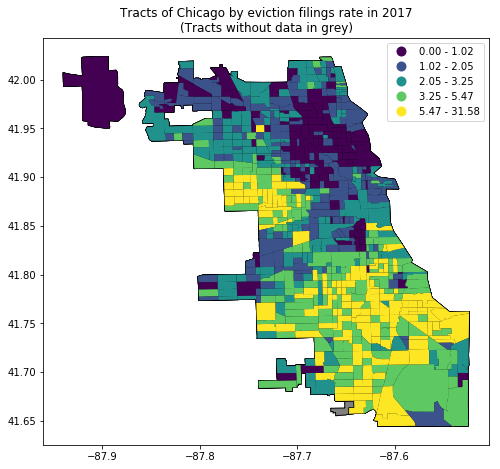

In [9]:
dcts.plot_map(eviction_df, 'eviction_filings_rate', 2017)

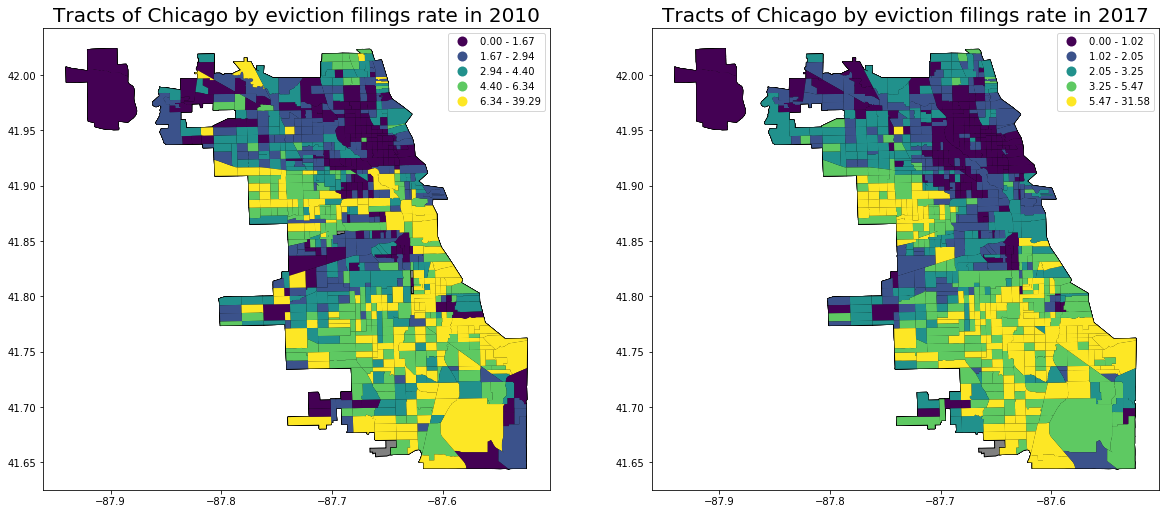

In [58]:
dcts.plot_map(eviction_df, 'eviction_filings_rate',[2010, 2017], True)

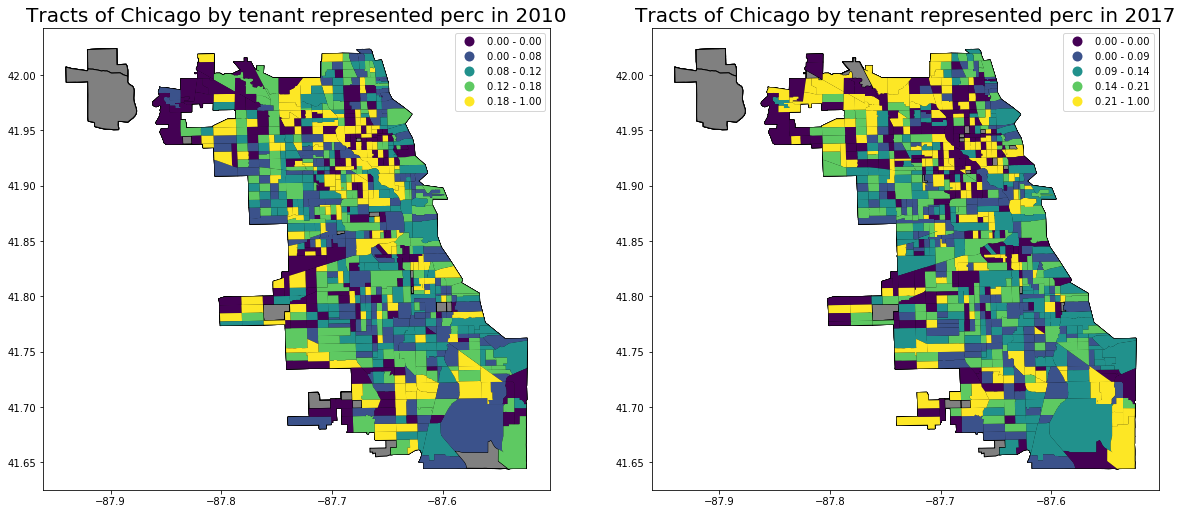

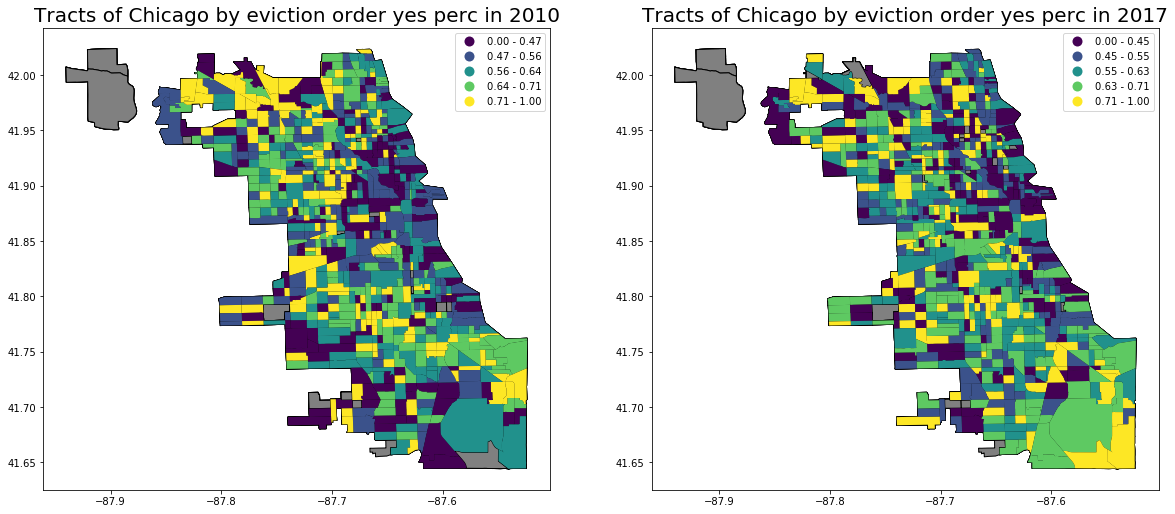

In [70]:
to_pctg = ['tenant_represented', 'tenant_rep_pa', 'tenant_rep_laa', 'eviction_order_yes']
pctages = eviction_df[to_pctg].div(eviction_df['eviction_filings_completed'], axis=0).add_suffix('_perc')
type(eviction_df)
to_plot = pd.merge(eviction_df, pctages, left_index=True, right_index=True)
dcts.plot_map(to_plot, 'tenant_represented_perc',[2010, 2017], 'viridis', False, 'represented.png')
dcts.plot_map(to_plot, 'eviction_order_yes_perc',[2010, 2017], 'viridis', False, 'order.png')

In [16]:
eviction.tenant_represented

0        7
1        6
2        4
3        6
4        4
5        9
6        7
7        1
8       10
9        3
10       6
11       7
12       3
13       2
14       2
15       5
16       6
17       4
18       0
19       1
20       2
21       2
22       5
23       8
24       2
25       6
26       8
27       1
28       4
29       3
        ..
6402     1
6403     1
6404     2
6405     2
6406     6
6407     2
6408     1
6409     6
6410     2
6411     0
6412     5
6413     3
6414     1
6415     4
6416     5
6417     3
6418     2
6419     1
6420     2
6421     3
6422     4
6423     1
6424     2
6425     2
6426    10
6427     0
6428     3
6429    16
6430     0
6431     0
Name: tenant_represented, Length: 6432, dtype: int64

In [72]:
len(eviction.groupby('tract'))

804